In [110]:
# Basic Libraries for all data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Machine Learning Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

#for some fun later
from mpl_toolkits.mplot3d import Axes3D

### K-Nearest Neightbors is a distance based algorithm, and Logistic regression will used a type of Gradient Descent as a solver, so It is neccessary to Normalize or Standardize the data 

In [97]:
WordToken = pd.read_csv('WordToken_TextData.csv')
SenToken = pd.read_csv('SentenceToken_TextData.csv')
Processed = pd.read_csv('Processed_TextData.csv')


In [12]:
Combined = Processed.copy()
Combined

,Unnamed: 0,Unnamed: 0.1,ID,Text,POV
0,0,0,1873059,you thought it would be easy to find him follo...,SP
1,1,1,15729375,"raw, unbridled passion. it finds your lips af...",SP
2,2,2,21143303,"“i don’t get humans,” you say for the umpteent...",SP
3,3,3,7254226,"a young man stands in his father’s study, a sh...",SP
4,4,4,11795490,"you’ve heard the rumors, the whisperings behin...",SP
...,...,...,...,...,...
370,370,55,24032950,castiel stood in front of a blonde woman while...,TP_Omni
371,371,56,2001234,"""you: two years, it had been two years. john w...",TP_Omni
372,372,57,2135307,"""partner: everyone had one of those little hob...",TP_Omni
373,373,58,19173559,"the night after the apocalypse-that-wasn’t, an...",TP_Omni


In [ ]:
Combined.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
Combined.rename({"Unnamed: 0.1":"b"}, axis="columns", inplace=True)
Combined.drop(['a'], axis=1)
Combined.drop(['b'], axis=1)

In [ ]:
Combined['FP_PredictA'] = WordToken['I-me-my'].copy()

In [31]:
Combined['SP_PredictA'] = WordToken['you-your'].copy()
Combined['TP_PredictA'] = WordToken['she/her'].copy()
Combined['FP_PredictB'] = SenToken['I-me-my'].copy()
Combined

,ID,Text,POV,FP_PredictA,SP_PredictA,TP_PredictA,FP_PredictB
0,1873059,you thought it would be easy to find him follo...,SP,1.976574,7.979502,4.538799,61.363636
1,15729375,"raw, unbridled passion. it finds your lips af...",SP,0.220669,9.672674,8.201545,0.000000
2,21143303,"“i don’t get humans,” you say for the umpteent...",SP,5.418719,4.926108,2.463054,3.846154
3,7254226,"a young man stands in his father’s study, a sh...",SP,1.237785,7.947883,5.342020,2.645503
4,11795490,"you’ve heard the rumors, the whisperings behin...",SP,0.787163,8.204662,2.724796,0.995025
...,...,...,...,...,...,...,...
370,24032950,castiel stood in front of a blonde woman while...,TP_Omni,1.027397,0.722983,9.550989,1.652893
371,2001234,"""you: two years, it had been two years. john w...",TP_Omni,1.157775,1.589103,7.589860,1.837838
372,2135307,"""partner: everyone had one of those little hob...",TP_Omni,0.468925,0.184928,7.826432,0.539811
373,19173559,"the night after the apocalypse-that-wasn’t, an...",TP_Omni,4.513889,3.993056,5.324074,12.000000


### Dummy Coding my Categorical Variables

In [55]:
DummyData = Combined.copy()
DummyData

,ID,Text,POV,FP_PredictA,SP_PredictA,TP_PredictA,FP_PredictB
0,1873059,you thought it would be easy to find him follo...,SP,1.976574,7.979502,4.538799,61.363636
1,15729375,"raw, unbridled passion. it finds your lips af...",SP,0.220669,9.672674,8.201545,0.000000
2,21143303,"“i don’t get humans,” you say for the umpteent...",SP,5.418719,4.926108,2.463054,3.846154
3,7254226,"a young man stands in his father’s study, a sh...",SP,1.237785,7.947883,5.342020,2.645503
4,11795490,"you’ve heard the rumors, the whisperings behin...",SP,0.787163,8.204662,2.724796,0.995025
...,...,...,...,...,...,...,...
370,24032950,castiel stood in front of a blonde woman while...,TP_Omni,1.027397,0.722983,9.550989,1.652893
371,2001234,"""you: two years, it had been two years. john w...",TP_Omni,1.157775,1.589103,7.589860,1.837838
372,2135307,"""partner: everyone had one of those little hob...",TP_Omni,0.468925,0.184928,7.826432,0.539811
373,19173559,"the night after the apocalypse-that-wasn’t, an...",TP_Omni,4.513889,3.993056,5.324074,12.000000


In [70]:
DummyCol = pd.DataFrame(Combined['POV'].copy())
DummyCol = pd.get_dummies(DummyCol)
DummyCol

,POV_FP,POV_SP,POV_TP,POV_TP_Lim,POV_TP_Omni
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
370,0,0,0,0,1
371,0,0,0,0,1
372,0,0,0,0,1
373,0,0,0,0,1


In [71]:
Cols = ['POV_FP', 'POV_SP', 'POV_TP', 'POV_TP_Lim', 'POV_TP_Omni']
for i in Cols:
    DummyData[i] = DummyCol[i]
DummyData

,ID,Text,FP_PredictA,SP_PredictA,TP_PredictA,FP_PredictB,POV_SP,POV_TP,POV_TP_Lim,POV_TP_Omni,POV_FP
0,1873059,you thought it would be easy to find him follo...,1.976574,7.979502,4.538799,61.363636,1,0,0,0,0
1,15729375,"raw, unbridled passion. it finds your lips af...",0.220669,9.672674,8.201545,0.000000,1,0,0,0,0
2,21143303,"“i don’t get humans,” you say for the umpteent...",5.418719,4.926108,2.463054,3.846154,1,0,0,0,0
3,7254226,"a young man stands in his father’s study, a sh...",1.237785,7.947883,5.342020,2.645503,1,0,0,0,0
4,11795490,"you’ve heard the rumors, the whisperings behin...",0.787163,8.204662,2.724796,0.995025,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
370,24032950,castiel stood in front of a blonde woman while...,1.027397,0.722983,9.550989,1.652893,0,0,0,1,0
371,2001234,"""you: two years, it had been two years. john w...",1.157775,1.589103,7.589860,1.837838,0,0,0,1,0
372,2135307,"""partner: everyone had one of those little hob...",0.468925,0.184928,7.826432,0.539811,0,0,0,1,0
373,19173559,"the night after the apocalypse-that-wasn’t, an...",4.513889,3.993056,5.324074,12.000000,0,0,0,1,0


### Now Before we can scale our Numerical Variables, we need to split the data into a training set and a test set so we can scale the test set by the training set parameters.

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(DummyData.iloc[:,2:6], DummyData.iloc[:,6:] )

In [91]:
Scaler = StandardScaler().fit(X_train)
X_trainSTD = pd.DataFrame(Scaler.transform(X_train))
X_testSTD = pd.DataFrame(Scaler.transform(X_test))

# Model 1: Logistic Regression
### First We'll just do a lazy check for multicollinearity with a correlation matrix

<AxesSubplot:>

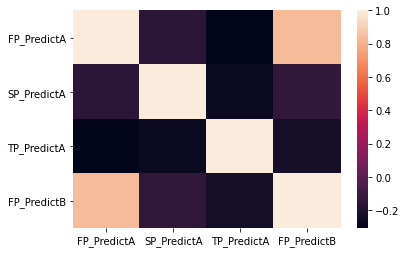

In [96]:
sns.heatmap(X_train.corr())

### both of the expected indicators for First Person text seem to be Highly correlated as suspected. ( >0.8). This an issue for predicitve purposes the way it would be for inference, but it's still good to keep a model simple if possible so I'll run a model without FP_predictA (which I suspect from previous analysis to be the weaker of the two.) to see if we still get similar performance without it. 

X_trainSTD

In [100]:
X_trainSTDsimp = X_trainSTD.copy().drop([0], axis=1)
X_testSTDsimp = X_testSTD.copy().drop([0], axis=1)

### Setting up a "one-versus-rest" style Logisitic regression to account for having more than two classes. 

In [108]:
LogModel_simp = OneVsRestClassifier(LogisticRegression(solver='lbfgs'))
LogModel_comp = OneVsRestClassifier(LogisticRegression(solver='lbfgs'))

LogModel_simp.fit(X_trainSTDsimp, Y_train)
LogModel_comp.fit(X_trainSTD, Y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [109]:
LogModel_simp.score(X_testSTDsimp, Y_test)

0.46808510638297873

In [112]:
LogModel_comp.score(X_testSTD, Y_test)

0.4787234042553192

### The Prediction accuracy is very low, But this isn't unexpected. We already knew we'd have to come back later to do some better feature engineering to discern between Third-Person Subtypes. For now let's merge all of the Third-Person Subtypes into one category.

In [125]:
DummyData2 = DummyData.copy()

In [126]:
DummyData2['POV_TP'] = DummyData['POV_TP'] + DummyData['POV_TP_Omni'] + DummyData['POV_TP_Lim']
DummyData2 = DummyData2.drop(columns=['POV_TP_Lim', 'POV_TP_Omni'])

In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(DummyData2.iloc[:,2:6], DummyData2.iloc[:,6:] )

Scaler = StandardScaler().fit(X_train)
X_trainSTD = pd.DataFrame(Scaler.transform(X_train))
X_testSTD = pd.DataFrame(Scaler.transform(X_test))

X_trainSTDsimp = X_trainSTD.copy().drop([0], axis=1)
X_testSTDsimp = X_testSTD.copy().drop([0], axis=1)

LogModel_simp = OneVsRestClassifier(LogisticRegression(solver='lbfgs'))
LogModel_comp = OneVsRestClassifier(LogisticRegression(solver='lbfgs'))

LogModel_simp.fit(X_trainSTDsimp, Y_train)
LogModel_comp.fit(X_trainSTD, Y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [143]:
LogModel_simp.score(X_testSTDsimp, Y_test)

0.8297872340425532

In [144]:
LogModel_comp.score(X_testSTD, Y_test)

0.8617021276595744

### Now we're seeing much more robust prediction results. with over a 3% lead, I think the model with the seemingly redudndant predictor is worth keeping. Now Let's take a look at the confusion matrix to see how the model is classifying. 

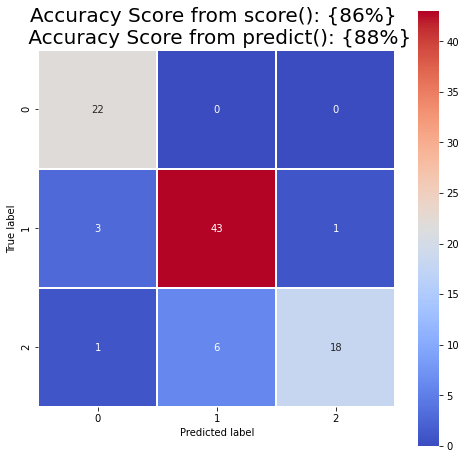

In [173]:
predictions = LogModel_comp.predict(X_testSTD)
Confusion = metrics.confusion_matrix(Y_test.values.argmax(axis=1), predictions.argmax(axis=1))

plt.figure(figsize=(8,8))
sns.heatmap(Confusion, annot=True, linewidths=1, square = True, cmap='coolwarm');
plt.ylabel('True label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score from score(): {86%} \n Accuracy Score from predict(): {88%}'
plt.title(all_sample_title, size = 20);

# 0 = Second person
# 1 = Thrid Person
# 2 = first person

### so here's the breakdown by Class: First Person (72%), Third Person (91%), Second Person (100%)                        
### The true positive rate for detecting First Person doesn't do that well with this method. Thankfully The rate of misclassification for Third Person is very low, which is important because the consumer of a product, who is likely avoiding first-person, and maybe second person, would be worse of having skipped a fic they may have liked, than if they accidentally clicked on a fic with a POV they don't like. 

# Model 2: K-NearestNeighbors

In [214]:
L1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
L2 = []
for i in range(1,11):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_trainSTD, Y_train)
    L2.append(KNN.score(X_testSTD, Y_test))

In [218]:
df = pd.DataFrame({'K': L1, 'Accuracy': L2})
df

,K,Accuracy
0,1,0.861702
1,2,0.797872
2,3,0.914894
3,4,0.893617
4,5,0.925532
5,6,0.893617
6,7,0.893617
7,8,0.882979
8,9,0.882979
9,10,0.882979


<AxesSubplot:xlabel='K', ylabel='Accuracy'>

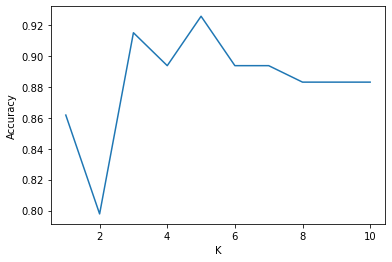

In [217]:
sns.lineplot(data=df, x="K", y="Accuracy")

In [219]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_trainSTD, Y_train)
KNN.score(X_testSTD, Y_test)

0.925531914893617

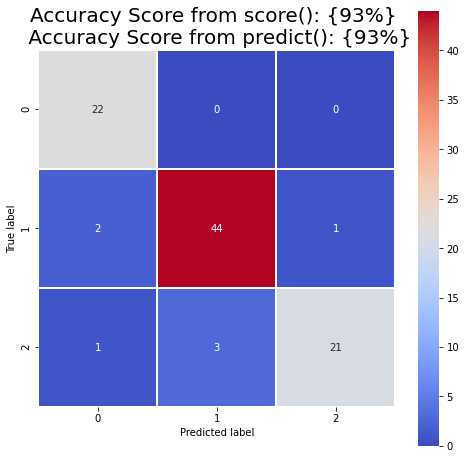

In [221]:
KnnPredict = KNN.predict(X_testSTD)
KnnConfusion = metrics.confusion_matrix(Y_test.values.argmax(axis=1), KnnPredict.argmax(axis=1))

plt.figure(figsize=(8,8))
sns.heatmap(KnnConfusion, annot=True, linewidths=1, square = True, cmap='coolwarm');
plt.ylabel('True label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score from score(): {93%} \n Accuracy Score from predict(): {93%}'
plt.title(all_sample_title, size = 20);

# 0 = Second person
# 1 = Thrid Person
# 2 = first person

### so here's the breakdown by Class: First Person (84%), Third Person (94%), Second Person (100%)
### Huge improvement over Logistic Regression for first person, and even for Third Person. second person still maxed out